<a href="https://colab.research.google.com/github/KeHang-Zhu/Harvard_Applied_Math_201/blob/main/AM201_HW4_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing()
from scipy.optimize import brentq
from scipy.integrate import solve_bvp, solve_ivp, odeint
from scipy import special
from scipy import integrat

# Problem1

They are second-order, linear equations, of the general form y′′ + p(x)y′ + q(x)y = 0 where p(x) and q(x) are functions that in general have singularities (diverge) at either x = 0 or x = ∞.

But there are no singularities anyplace else.

Examples of such special functions include the Legendre equation, the Laguerre equation, Bessel’s equation, the Airy equation, etc.

**Part(a)**

Invent your own equation. 


Let's invent a special function called the "EI Function," named after my favorite idol, Einstein. The EI Function, denoted as S_n(x), is the solution to the following second-order, linear differential equation:

$$y'' - (x^2 - n^2) y' + (n^2 - 1) y = 0$$

where n is a non-negative integer, and x is a real number.


**part(b)**

Now following the discussion in class and in the notes, analyze the solution of your equation near both x = 0 and x = ∞. Show that in each case there is a two-parameter family of solutions.

We will use the Frobenius method to find solutions near x = 0.

Firstly, we assume a solution of the form:
$$
y(x) = ∑_{k=0}^{∞} a_k x^{k+r}
$$

Substituting this into the differential equation, we can get:

$$
∑_{k=0}^{∞} (k+r)(k+r-1)a_k x^{k+r-2} - ∑_{k=0}^{∞} (x^2 - n^2)(k+r)a_k x^{k+r-1} + ∑_{k=0}^{∞} (n^2 - 1)a_k x^{k+r} = 0
$$

To solve this equation we must equate the coefficient of every power of x to zero.
Comparing the coefficients of powers of x, we obtain a recurrence relation for the coefficients $a_k$.

The lowest power of x in the equation is $x^{r-2}$ – its coefficient is $a_0(r − 1)r$.

Hence this coefficient can vanish with a_0 = 0 as long as

$$
r_1 = 0\\
r_2 = 1\\
$$


We therefore have two possible solutions, namely
$$
y(x) = A * ∑_{k=0}^{∞} a_k x^{k} + B * ∑_{k=0}^{∞} b_k x^{k+1}
$$

Thus, there is a two-parameter family of solutions near x = 0:

$$
y(x) = A * ∑_{k=0}^{∞} a_k x^{k} + B * ∑_{k=0}^{∞} b_k x^{k+1}
$$

**Now we need to examine the solutions as x → ∞**

We expect an
oscillatory damped solution. With this in mind, we make the ansatz:

$$y(x) = e^{u(x)} $$

And we have:

$$
y' = u'(x)e^{u(x)} \\
y'' = (u''(x) + (u'(x))^2)e^{u(x)}\\
$$


Substituting these into our differential equation:
$$
(u''(x) + (u'(x))^2)e^{u(x)} - (x^2 - n^2)(u'(x)e^{u(x))} + (n^2 - 1)e^{u(x)} = 0
$$

Dividing by e^(u(x)) and rearranging, we get:
$$
u''(x) + (u'(x))^2 - (x^2 - n^2)u'(x) + (n^2 - 1) = 0
$$


Trying the various choices demonstrates that the two consistent balances in the limit x → ∞ is

$$
(u'(x))^2 - (x^2-n^2)u'(x)=0 \\
u''(x) - (x^2-n^2)u'(x)=0 \\
$$

Integrating, we find that:
$$
u(x) = (1/3)x^3 - n^2 x \\
u(x) = \int exp(x'^3/3) dx'\\
$$

Thus, as x → ∞, we have $y(x) =  e^{ (x^3/3 - n^2x}$ or $y(x) =  e^{\int exp(x'^3/3) dx'}$  , which represents a two-parameter family of solutions:
$$
y(x) = C * e^{ x^3/3 -n^2x} + D * e^{\int exp(x'^3/3- n^2x') dx'}
$$

**part(c)**

You need to make a choice of which independent solutions you should pick. (i.e. you need two solutions to the equation that are different from each other in each asymptotic limit.) Make your choice and make a plot of each of your solutions.

We will choose one solution that is regular at x = 0 and another solution as x → ∞. Based on our previous analysis, the two independent solutions are:

Regular solution at x = 0:
$$
y_1(x) = ∑_{k=0}^{∞} a_k x^k
$$
I choose this because for the other branch, it is always 0 at origin.

solution as x → ∞:
$$
y_2(x) = C*e^{x^3/3 - n^2 x}
$$
I choose this because it is diverge less rapidly as compared with the other branch, .



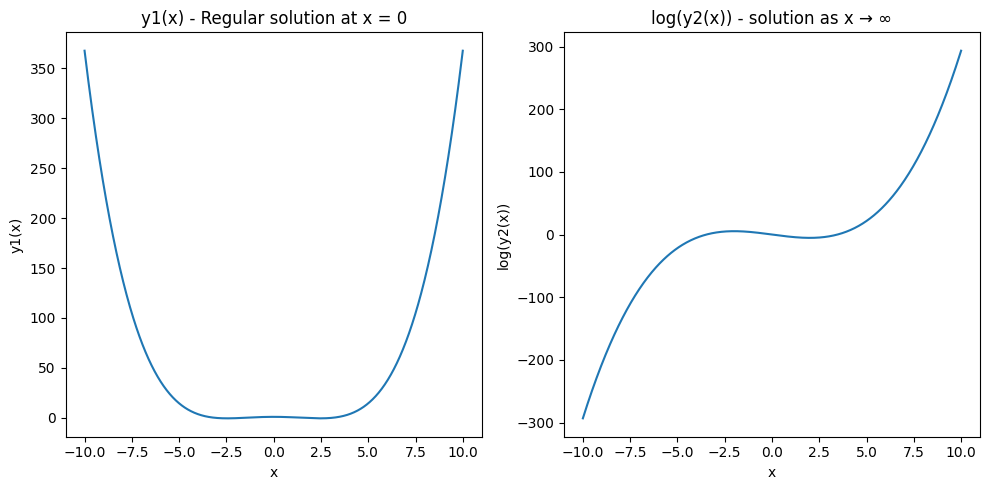

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the x range
x = np.linspace(-10, 10, 1000)

# Define the first few terms of the series solution for y1(x) with n = 2
y1 = 1 - (1/2) * x**2 + (1/24) * x**4

# Define the vanishing solution as x → ∞ (y2(x)) and n=2
y2 = np.exp( 1/3 * x**3 - 4 * x)

# Create the plots
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(x, y1)
plt.title('y1(x) - Regular solution at x = 0')
plt.xlabel('x')
plt.ylabel('y1(x)')

plt.subplot(1, 2, 2)
plt.plot(x, np.log(y2))
plt.title('log(y2(x)) - solution as x → ∞')
plt.xlabel('x')
plt.ylabel('log(y2(x))')

plt.tight_layout()
plt.show()


**part(d)**

Write a python function which gives you the value of your function. (It violates the spirit of this problem to simply make your function integrate the equation numerically–as described in the notes, special function evaluators tend to use simpler formulas than this!).


In [ ]:
import numpy as np

def ei_function(x, n, terms=3):
    # Truncated series solution for y1(x)
    y1_series = 0
    a_k = 1
    y1_series = 1 - (1/2) * x**2 + (1/24) * x**4

    # Closed-form expression for y2(x)
    y2 = np.exp(x**3/3 - n**2*x)

    return y1_series, y2

# Example usage:
x_value = 3
n_value = 2
y1, y2 = ei_function(x_value, n_value)
print(f"y1({x_value}) = {y1}")
print(f"y2({x_value}) = {y2}")


y1(3) = -0.125
y2(3) = 0.049787068367863944


**part(e)**

Compare the performance of your function evaluator with a small set of initial conditions using scipy.

<ipython-input-67-4e1fd34fb6cf>:54: RuntimeWarning: invalid value encountered in log
  plt.plot(x_values, np.log(-y1_ivp), label='exact')
<ipython-input-67-4e1fd34fb6cf>:57: RuntimeWarning: invalid value encountered in log
  plt.plot(x_values, np.log(-y2), 'o', label='own_evaluator')


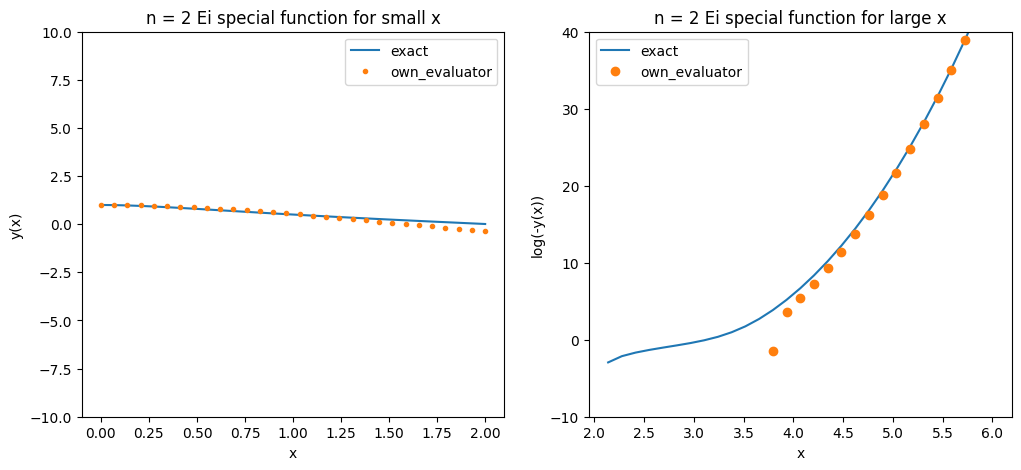

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp

# Our previously defined swiftian_function
def ei_function(x, n, terms=5):
    # Truncated series solution for y1(x)
    y1_series = 0
    a_k = 1
    # for k in range(terms):
    #     y1_series += a_k * x**(k + n)
    #     a_k *= -1 / (k + 1) * (k + n) / (2 * (k + n) + 1)
    y1_series = 1 - (1/2) * x**2 + (1/24) * x**4

    # Closed-form expression for y2(x)
    y2 = - 0.5*np.exp( 1/3* x**3 - 4*x) + 10

    return y1_series, y2

# Define the Swiftian Function's differential equation
def ei_ode(x, y, n):
    y1, y2 = y
    dy1 = y2
    dy2 = (x**2 - n**2) * y2 - (n**2 - 1) * y1
    return [dy1, dy2]

# Set the initial conditions
x0 = 0
y10 = 1
y20 = 0
n_value = 2

# Solve the differential equation using scipy.integrate.solve_ivp
sol = solve_ivp(ei_ode, (x0, 10), [y10, y20], args=(n_value,), dense_output=True)

x_values = np.linspace(0, 2, 30)
y1_ivp = sol.sol(x_values)[0]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x_values, y1_ivp, label='exact')
y1, y2 = ei_function(x_values, n_value )
plt.plot(x_values, y1, '.', label='own_evaluator')
# plt.plot(x_values, y2, '.')
plt.title('n = 2 Ei special function for small x')
plt.ylim([-10,10])
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()


x_values = np.linspace(2, 6, 30)
y1_ivp = sol.sol(x_values)[0]
plt.subplot(1, 2, 2)
plt.plot(x_values, np.log(-y1_ivp), label='exact')
y1, y2 = ei_function(x_values, n_value)
# plt.plot(x_values, y1, '.')
plt.plot(x_values, np.log(-y2), 'o', label='own_evaluator')
plt.title('n = 2 Ei special function for large x')
plt.ylim([-10,40])
plt.xlabel('x')
plt.ylabel('log(-y(x))')
plt.legend()

# Compare the performance for a set of x values

# print(f"x\tOur Function\tsolve_ivp\tDifference")
# for x_val in x_values[0:10]:
#     y1, y2 = swiftian_function(x_val, n_value)
#     y1_ivp = sol.sol(x_val)[0]
#     diff = abs(y1 - y1_ivp)
#     print(f"{x_val}\t{y1:.6f}\t{y1_ivp:.6f}\t{diff:.6f}")

# for x_val in x_values[11:]:
#     y1, y2 = swiftian_function(x_val, n_value)
#     y1_ivp = sol.sol(x_val)[0]
#     diff = abs(y2 - y1_ivp)
#     print(f"{x_val}\t{y1:.6f}\t{y1_ivp:.6f}\t{diff:.6f}")


# Problem2: A Boundary Value Problem

Consider the ordinary differential equation:

$$
f f ′′ + 2 f ′′′ = 0
$$

This equation has great historical importance, in that, it came out of the first boundary layer calculation ever performed, and we will discuss it later on). For now, solve this equation subject to the boundary conditions f (0) = f ′ (0) = 0 and f ′ (∞) = 1. Use any method that you can find.


 We will solve this problem using the shooting method.

To solve the given ODE with boundary conditions, we can start by making a substitution to reduce the order of the equation.

Guessing 
$$
f ∼ e^{u(x)}
$$

$$
f' = u'(x)e^{u(x)} \\
f'' = (u''(x) + (u'(x))^2)e^{u(x)}\\
f'' = (u'''(x) + 2u''(x)u'(x)+ (u'(x))^3)e^{u(x)}\\
$$

Plugging in
$$
(u''(x) + (u'(x))^2)e^{2u(x)} + 2 (u'''(x) + 2u''(x)u'(x)+ (u'(x))^3)e^{u(x)} =0
$$

which turned out not to be a good idea.






We will first use the solve bvp method in Scipy package to get a better sense of the problem.

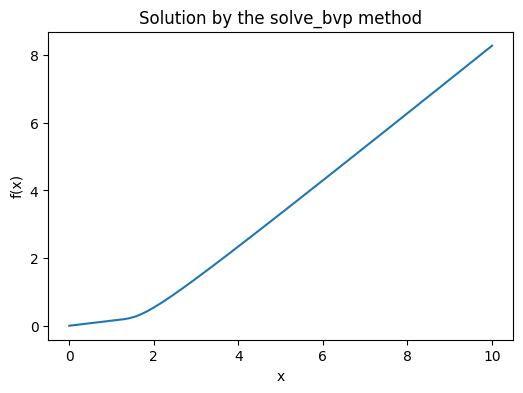

In [ ]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

def ode_system(x, y):
    f, g, h = y
    eps = 1e-6
    return [g, h, -2 * h / (f + eps)]

def bc(ya, yb):
    return [ya[0], ya[1], yb[1] - 1]

# Parameters
large_boundary = 10
num_points = 10000
x_eval = np.linspace(0, large_boundary, num_points)
y_init = np.zeros((3, num_points))

# Solve the ODE system using the solve_bvp method
sol = solve_bvp(ode_system, bc, x_eval, y_init)

plt.figure(figsize=(6,4))
# Plot the solution
plt.plot(sol.x, sol.y[0])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Solution by the solve_bvp method')
plt.show()


As we can see from the plot, the solution contains three part: the first part near origin is very flat, since both the function value and its devirative is 0 and the second part at large value is a straight line with slope 1. Between 0 and large value of x, we can see the connection part.

Next, we will use the shooting method to solve the problem again.

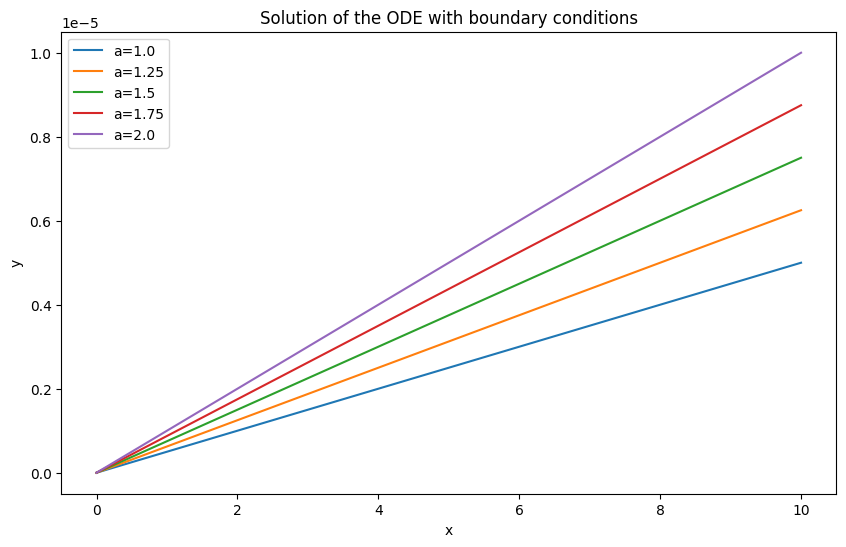

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def ode_system(t, y):
    f, g, h = y
    eps = 1e-6
    return [g, h, -2 * h / (f + eps)]

# Parameters
large_boundary = 10
num_points = 100
initial_guess = 1
alpha_list = np.linspace(1, 2 ,5)

# Solve the ODE using the initial guess
sol =[ solve_ivp(ode_system, (0, large_boundary), [0, 0, alpha], t_eval=np.linspace(0, large_boundary, num_points)) for alpha in alpha_list]

# Plot the solution
plt.figure(figsize = (10,6))
for i in range(len(alpha_list)):
    plt.plot(sol[i].t, sol[i].y[0],label = "a="+str(alpha_list[i]))
    plt.xlabel("x")
    plt.ylabel("y");
plt.legend()

plt.title('Solution of the ODE with boundary conditions')
plt.show()


Another method is to reduce this boundary value problem to an initial value problem.

If F(η) is any solution of equation, also
$$
f = CF(Cη)
$$
is a solution, with C an arbitrary constant of homology. Then,

$$
lim_{η → ∞} f′(η) = C^2 lim_{η → ∞} F′(Cη) = C^2 lim_{η → ∞} F′(η).
$$

Since f′(η) = 1 for η → ∞, we have that

$$
C = (lim_{η → ∞} F' (η))^{-1/2}
$$

We know that $f′′(0) = C^3F′′(0)$, and if we specify $F′′(0) = 1$, we have from equation that

$$
f′′(0) = (lim_{η → ∞} F′ (η))^{-3/2}
$$

To obtain the value f′′(0), we need to evaluate numerically the initial value problem for F (η), given by equation  with initial conditions F (0) = F ′(0) = 0 and F ′′(0) = 1, for a large value of η to obtain F′(η) as η → ∞ and f′′(0). Therefore, the initial value problem for f(η) equivalent to the boundary value problem given by equations is given by the ordinary differential equation plus the initial conditions

$$
f(0) =0,\\
f′(0) =0,\\
f''(0)= \{lim_{η→∞} F(η)\}^{-3/2} . \\
$$

We can obtain numerically that f′′(0) ≈ 0.46960 in literature.

 # Problem3: Another Boundary Value Problem

Consider the problem:

$$
εy′′ +yy′ −y = 0
$$

for 0 ≤ x ≤ 1. Let the boundary conditions be y(0) = 0, and y(1) = 3. Find the solution numerically. Note: The numerics here might be tricky. What I recommend is that you try to do it by ”shooting”, namely, start at one boundary and try to find a solution that matches the other with the right boundary condition.

We can start with neglecting $ϵ$

$$
yy′ −y = 0
$$
Which can be reduced to:
$$
y′ = 1
$$

And by solving this, we can get:

$$
y = x+ c
$$

However, when we look at the boundary conditions  y(0) = 0, and y(1) = 3. We will find that it is impossible to connect these two conditions at the same time.

So, we can use the shooting method to start at one boundary by setting $y(0) = 0$. So, we can get:
$$
y_0 = x
$$

And then, we can include the $ϵ$ part by
$$
y = x + u
$$

So, we can get
$$
ϵ u''+ (x+u)(1+ u') - (x+u) =0 \\
ϵ u''+ (x+u) u'  =0 \\
$$




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing()
from scipy.optimize import brentq
from scipy.integrate import solve_bvp, solve_ivp, odeint
from scipy import special
from scipy import integrate

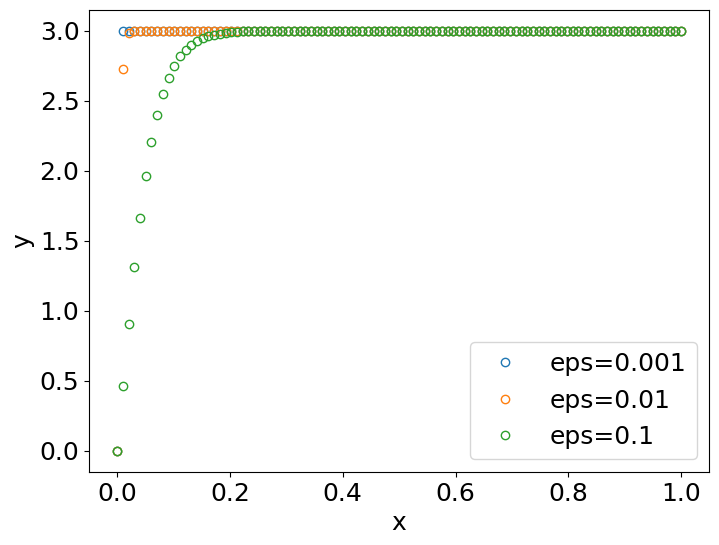

In [ ]:
def eq_8_7(x, u, eps): 
    """It's (x,u). Different from odeint"""
    return np.vstack( (u[1],-(u[1]*(x + u[0]))/eps)) 
    """Different return form"""

def bc(ua,ub): 
    """Boundary conditions. ua, ub means two boundaries at x_min and x_max
    [i] stands for that is it the boundary condition for the ith component.
    if the condition is u(-1)=5, we should write ua[0]-5"""
    return np.array([ua[0],ub[0]-3])

x = np.linspace(0, 1, 100)
u = np.zeros((2,x.size))

eps_list = [0.001,0.01,0.1]

result = [solve_bvp(lambda x, u: eq_8_7(x,u,eps), bc, x, u) for eps in eps_list]
"""The arguments for solve_bvp are familiar"""

x_plot = np.linspace(0, 1, 100)
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(8,6))
for i in range(len(eps_list)):
    plt.plot(x_plot, result[i].sol(x_plot)[0], 'o', mfc='none', label='eps='+str(eps_list[i]))
    #plt.plot(x_plot, -np.exp(-(x_plot+1)/np.sqrt(eps_list[i]))-np.exp(-(1-x_plot)/np.sqrt(eps_list[i]))+1/(2-x_plot**2),label='eps='+str(eps_list[i]))
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y");

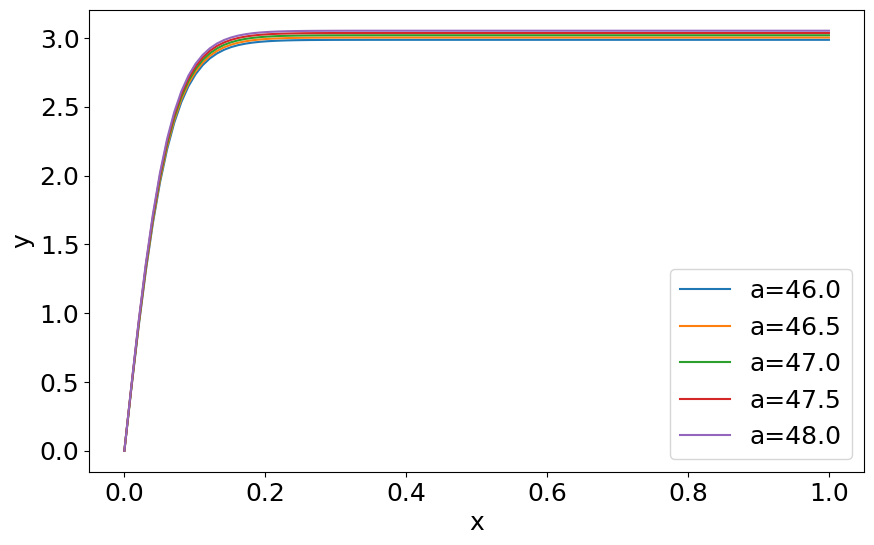

In [ ]:
def eq_8_7_shoot(x,u,eps):
    return [u[1],-(u[1]*(x + u[0]))/eps]

x_min = 0
x_max = 1
alpha_list = np.linspace(46,48 ,5)
x_eval = np.linspace(0,1,100)
result_shot = [solve_ivp(eq_8_7_shoot,(x_min,x_max),[0,alpha],t_eval= x_eval,args=(0.1,)) for alpha in alpha_list]

plt.figure(figsize = (10,6))
for i in range(len(alpha_list)):
    plt.plot(result_shot[i].t,result_shot[i].y[0],label = "a="+str(alpha_list[i]))
    plt.xlabel("x")
    plt.ylabel("y");
plt.legend()

In [ ]:
a1=46
a2=48
max_iter = 1000
iters = 0
while a2-a1>1e-16 and iters < max_iter:
    a = (a1+a2)/2
    sol = solve_ivp(eq_8_7_shoot, (x_min,x_max) , [0,a], t_eval=np.linspace(0, 1, 20),args=(0.1,))
    
    ## Criteria: solution at 1 is exactly 0
    if sol.y[0][-1]<3:
        a1 = a    
    else:
        a2 = a
    iters += 1 
a

46.41433075099138

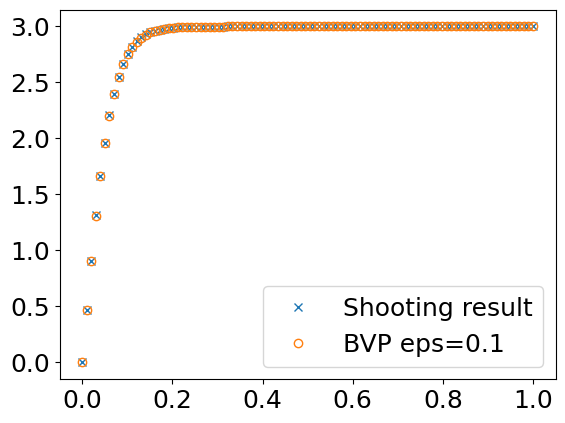

In [ ]:
result_shot_1 = solve_ivp(eq_8_7_shoot,(x_min,x_max),[0,a],t_eval= x_eval,args=(0.1,))
plt.plot(result_shot_1.t, result_shot_1.y[0],'x',label = "Shooting result")
plt.plot(x_plot, result[-1].sol(x_plot)[0], 'o', mfc='none', label='BVP eps='+str(eps_list[-1]))
plt.legend()